In [11]:
import pyfiles.HFSAnalyzer as HFSAnalyzer
reload(HFSAnalyzer)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
sns.set_style('white')
sns.set_palette('colorblind')
%matplotlib inline

df = HFSAnalyzer.directory_to_df()
df = df.sort_values(by='Nk')

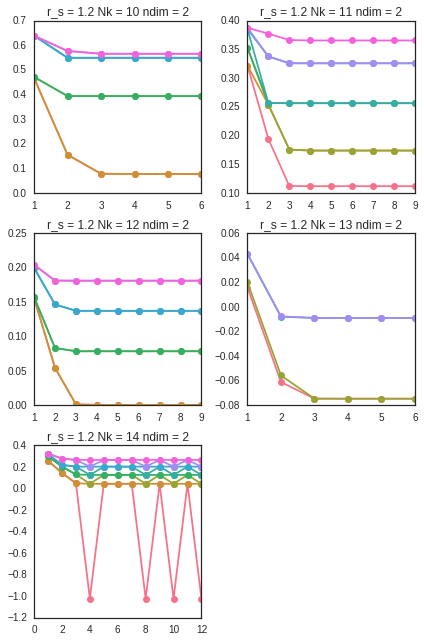

In [20]:
"""
fig = plt.figure()
fig, axes = HFSAnalyzer.df_ApplyAxplotToRows(df, None, HFSAnalyzer.axplot_1stBZ, 
                                             spec_alpha=0.5, scale=1.05, labels=False)

plt.tight_layout()
plt.show()
"""

"""
fig = plt.figure()
fig, axes =  HFSAnalyzer.df_ApplyAxplotToRows(df[:5], None, HFSAnalyzer.axplot_exc_hist)
plt.tight_layout()
plt.show()
"""

fig = plt.figure()
axplot = HFSAnalyzer.axplot_eval_convergence
fig, axes = HFSAnalyzer.df_ApplyAxplotToRows(df, None, axplot, palette='husl')
plt.tight_layout()
plt.show()

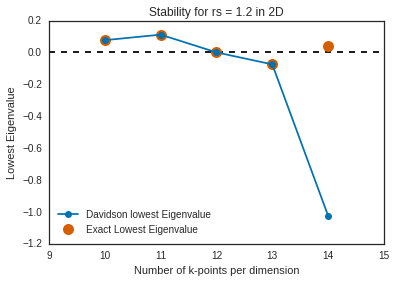

In [21]:
plt.figure()
HFSAnalyzer.plot_dav_vs_full(df)
plt.show()

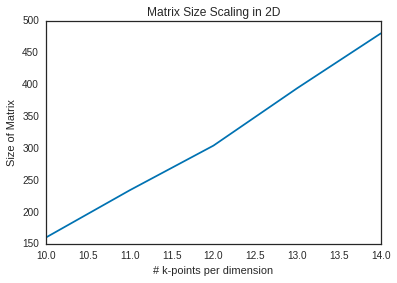

In [14]:
plt.figure()
Nexcs = df.Nexc.as_matrix()
Nks = df.Nk.as_matrix()
plt.plot(Nks, 2*Nexcs)
plt.xlabel('# k-points per dimension')
plt.ylabel('Size of Matrix')
plt.title('Matrix Size Scaling in 2D')
plt.show()

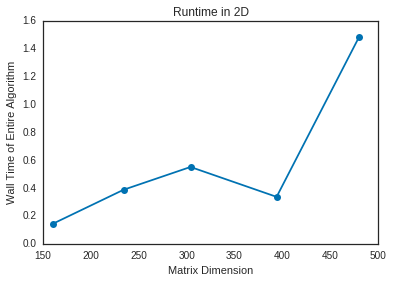

In [15]:
Walltime = [float(s.split()[0]) for s in df['Total Elapsed Time']]
Nexcs = df.Nexc.as_matrix()
plt.title('Runtime in 2D')
plt.xlabel('Matrix Dimension')
plt.ylabel('Wall Time of Entire Algorithm')
plt.plot(2*Nexcs, Walltime, 'o-')

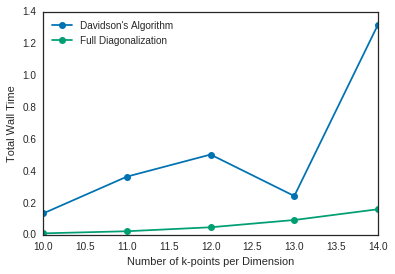

In [16]:
Nks =  df.Nk.as_matrix()
Davtimes =  df.Dav_time.as_matrix()

df_with_fulldiags = df[df['full_diag_min'].notnull()]
fulltimes = df_with_fulldiags.full_diag_time.as_matrix()
Nkfull = df_with_fulldiags.Nk.as_matrix()

plt.figure()
plt.plot(Nks, Davtimes, '-o', label="Davidson's Algorithm")
plt.plot(Nkfull, fulltimes, '-o', label='Full Diagonalization')
plt.xlabel('Number of k-points per Dimension')
plt.ylabel('Total Wall Time')
plt.legend(loc='best')
plt.show()

(0, 0.0019804050000000002)

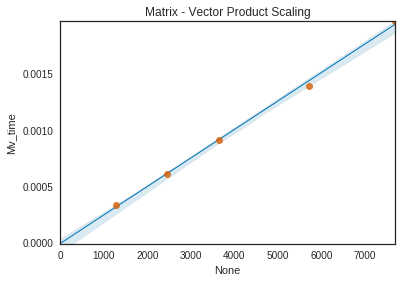

In [17]:
plt.figure()
Nexcs = df['Nexc']
Noccs = df['Nocc']
mvtimes = df['Mv_time']

plt.xlabel('Nexc x Nocc')
plt.ylabel('Execution Time')
plt.title('Matrix - Vector Product Scaling')

sns.regplot(Nexcs*Noccs, mvtimes, scatter_kws={'color' : sns.color_palette()[2], 's' : 50, 'zorder' : 2}
                                , line_kws={'zorder' : 1, 'linewidth' : 1})

plt.xlim(0, np.amax(Nexcs * Noccs))
plt.ylim(0, np.amax(mvtimes))

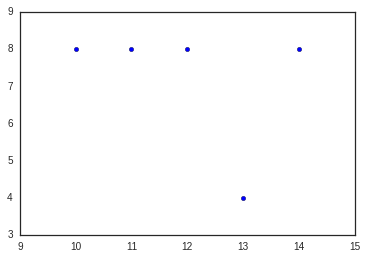

In [18]:
plt.figure()
degen = df['ground_state_degeneracy']
Nks = df.Nk.as_matrix()
plt.scatter(Nks, degen)
plt.show()

In [19]:
df['full_diag_min']

000001.200_00010_2_X6i5vT    0.077257
000001.200_00011_2_sDiRm3    0.111856
000001.200_00012_2_K8zEbH    0.000679
000001.200_00013_2_lU9Ixn   -0.074564
000001.200_00014_2_tj61HA    0.042969
Name: full_diag_min, dtype: float64